In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

In [3]:
train_data = pd.read_csv("../dataset/data.csv")
print(train_data.shape)

(1000, 8)


In [4]:
train_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
train_data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
# 1) By Looking at the Data Numerical data are Normally Distributed
# 2) There are No Zero Varancience in the numerical column

In [9]:
# Checking the Missing Values
features_with_na=[features for features in train_data.columns if train_data[features].isnull().sum()>=1]
if not features_with_na:
    print("There are No Missing Values")
    return
for feature in features_with_na:
    print(feature, np.round(train_data[feature].isnull().mean()*100, 2),  ' % missing values')

There are No Missing Values


In [10]:
# Seperating the Numirical and Non Numirical data
numerical_features = [feature for feature in train_data.columns if train_data[feature].dtypes != 'O']
non_numerical_feature = [feature for feature in train_data.columns if train_data[feature].dtypes == 'O']

In [11]:
numerical_features

['math score', 'reading score', 'writing score']

In [12]:
non_numerical_feature

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [13]:
# to find the Discrete Data in the Numeric data
for feature in numerical_features:
    print(f'{feature} => {len(train_data[feature].unique())}')

math score => 81
reading score => 72
writing score => 77


In [14]:
# 3) there are no Discrete Data in the Numeric data

In [15]:
continuous_numerical_feature=[feature for feature in numerical_features if len(train_data[feature].unique())>25 ]
print("Continuous Numerical Variable Count : {}".format(len(continuous_numerical_feature)))

Continuous Numerical Variable Count : 3


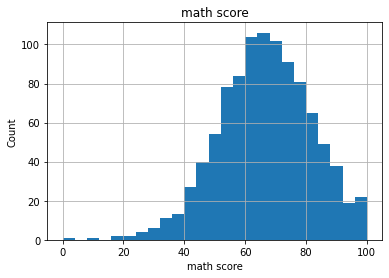

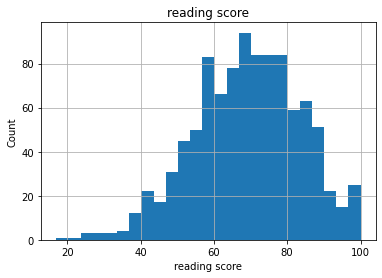

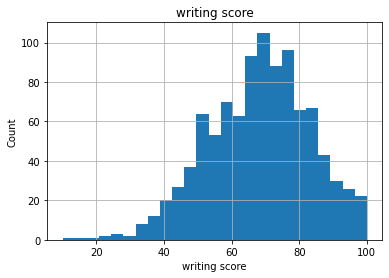

In [16]:
for feature in continuous_numerical_feature:
    data=train_data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [17]:
# By Looking at this Data there is Some Left Skeweness in all the Numerical Data

In [27]:
def coorilation_detection(data, features = None):
    corrmat = data.corr()
    columns = features if features != None else [ i for i in data.columns if (data[i].dtypes != 'O' ) ]
    coorilated_variables = {}
    for variable in columns:
        for variable1 in columns:
            if variable == variable1:
                continue
            elif abs(corrmat[variable][variable1]) >= 0.75:
                if ((variable not in coorilated_variables.keys()) and 
                    (variable1 not in coorilated_variables.keys())): 
                    coorilated_variables[variable] = []
                    coorilated_variables[variable].append(variable1)
                elif (variable1 not in coorilated_variables.keys()):  
                    coorilated_variables[variable].append(variable1)
    return coorilated_variables 

In [28]:
coorilation_detection(train_data)

{'math score': ['reading score', 'writing score'],
 'reading score': ['writing score']}

In [29]:
# 4) By Looking at this Data there is a High Coorilation among the Three

In [24]:
# Getting the Unique Values from the Non Numeric Data
for feature in non_numerical_feature:
    print(f"-----------------------{feature}----------------------")
    print(train_data[feature].unique())
    print(f"------------------------------------------------------\n\n")


-----------------------gender----------------------
['female' 'male']
------------------------------------------------------


-----------------------race/ethnicity----------------------
['group B' 'group C' 'group A' 'group D' 'group E']
------------------------------------------------------


-----------------------parental level of education----------------------
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
------------------------------------------------------


-----------------------lunch----------------------
['standard' 'free/reduced']
------------------------------------------------------


-----------------------test preparation course----------------------
['none' 'completed']
------------------------------------------------------




By Looking at this Data Set <br>
We Cannot use Supervised ML Algorithem here as there is no <b>Target Variable</b><br>
We Are supposed to <b>use a Clustering Algorithem(K-Means,K-Means++)</b> and Study in depth about the Data
